In [18]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand.names

--2019-10-12 19:02:07--  http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24538333 (23M) [application/x-httpd-php]
Saving to: ‘poker-hand-testing.data.1’

poker-hand-testing. 100%[===================>]  23.40M  24.5MB/s    in 1.0s    

2019-10-12 19:02:08 (24.5 MB/s) - ‘poker-hand-testing.data.1’ saved [24538333/24538333]

--2019-10-12 19:02:10--  http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613694 (599K) [application/x-httpd-php]
Saving to: ‘poker-hand-training-true.data.1’

poker

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
data_train=pd.read_csv("poker-hand-training-true.data",header=None)
data_test = pd.read_csv("poker-hand-testing.data",header=None)
col=['Suit of card #1','Rank of card #1','Suit of card #2','Rank of card #2','Suit of card #3','Rank of card #3','Suit of card #4','Rank of card #4','Suit of card #5','Rank of card 5','Poker Hand']
col

['Suit of card #1',
 'Rank of card #1',
 'Suit of card #2',
 'Rank of card #2',
 'Suit of card #3',
 'Rank of card #3',
 'Suit of card #4',
 'Rank of card #4',
 'Suit of card #5',
 'Rank of card 5',
 'Poker Hand']

In [0]:
data_train.columns=col
data_test.columns=col

In [0]:
y_train=data_train['Poker Hand']
y_test=data_test['Poker Hand']
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [0]:
x_train=data_train.drop('Poker Hand',axis=1)
x_test=data_test.drop('Poker Hand',axis=1)

In [24]:
print('Shape of Training Set:',x_train.shape)
print('Shape of Testing Set:',x_test.shape)

Shape of Training Set: (25010, 10)
Shape of Testing Set: (1000000, 10)


In [25]:
x_train.head()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10


In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers


model = Sequential()
model.add(Dense(15, activation='relu', input_dim=10))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs = 10, batch_size = 256, verbose=1,validation_data=(x_test,y_test),shuffle=True)


score = model.evaluate(x_test, y_test, batch_size=256)

Train on 25010 samples, validate on 1000000 samples
Epoch 1/10
25010/25010 [==============================] - 4s 156us/step - loss: 0.3935 - acc: 0.8842 - val_loss: 0.3070 - val_acc: 0.8999
Epoch 2/10
25010/25010 [==============================] - 4s 147us/step - loss: 0.2283 - acc: 0.8996 - val_loss: 0.1818 - val_acc: 0.8997
Epoch 3/10
25010/25010 [==============================] - 4s 145us/step - loss: 0.1790 - acc: 0.8998 - val_loss: 0.1767 - val_acc: 0.9000
Epoch 4/10
25010/25010 [==============================] - 4s 143us/step - loss: 0.1758 - acc: 0.9001 - val_loss: 0.1750 - val_acc: 0.9001
Epoch 5/10
25010/25010 [==============================] - 4s 149us/step - loss: 0.1748 - acc: 0.9000 - val_loss: 0.1743 - val_acc: 0.9000
Epoch 6/10
25010/25010 [==============================] - 4s 144us/step - loss: 0.1743 - acc: 0.9001 - val_loss: 0.1740 - val_acc: 0.9000
Epoch 7/10
25010/25010 [==============================] - 4s 146us/step - loss: 0.1740 - acc: 0.9003 - val_loss: 0.1737 

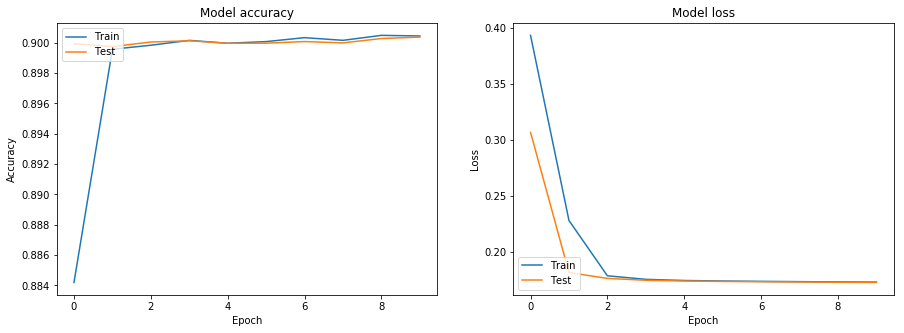

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(data_train['Poker Hand'])
y_test=le.transform(data_test['Poker Hand'])

In [0]:
#Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100,multi_class='ovr').fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.501209

In [0]:
#CART

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0,max_depth = 2)
decision_tree = decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
accuracy_score(y_pred,y_test)

0.501209

In [33]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train,y_train) 
y_pred = clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.431699

In [34]:
accuracy_score(y_pred,y_test)

0.431699